In [30]:
import numpy as np

np.random.seed(42)

mu, sigma = 0, 1
q = {k+1: v for k, v in enumerate(np.random.normal(mu, sigma, 8))} # almaceno 10 numeros random
q

{1: 0.4967141530112327,
 2: -0.13826430117118466,
 3: 0.6476885381006925,
 4: 1.5230298564080254,
 5: -0.23415337472333597,
 6: -0.23413695694918055,
 7: 1.5792128155073915,
 8: 0.7674347291529088}

Inicio el entrenamiento sabiendo que el valor inicial es N

In [33]:
# partidas de entrenamiento
partidas = 10000
turnos = 100
alpha=0.5
epsilons = [0, 0.1]
recompensas_medias = np.zeros((len(epsilons), turnos)) # inicializo las recompensas medias
acciones_optimas = np.zeros((len(epsilons), turnos)) # inicializo las acciones optimas

for init in range(partidas):
    mejor_accion = max(q, key=q.get) # accion con mayor valor
    for i, e in enumerate(epsilons): # para cada 'partida' en la lista de epsilons
        Q = {k: 5 for k in range(1,6)}
        # inicializamos a valores altos si el agente es greedy
        for experience in range(turnos):
            if np.random.uniform(0,1) < e: # si el numero random es menor que epsilon
                accion = np.random.randint(5) +1 # elijo una accion random
            else:
                maxQ = -100
                for k in Q:
                    if Q[k] > maxQ:
                        maxQ = Q[k]
                        accion = k # elijo la accion con mayor valor
            recompensa = q[accion] # obtengo la recompensa de la accion elegida
            Q[accion] = alpha * (recompensa - Q[accion])
            recompensas_medias[i][experience] += recompensa
            acciones_optimas[i][experience] += (accion == mejor_accion)

# valores para la grafica
recompensas_medias /= partidas
acciones_optimas /= partidas


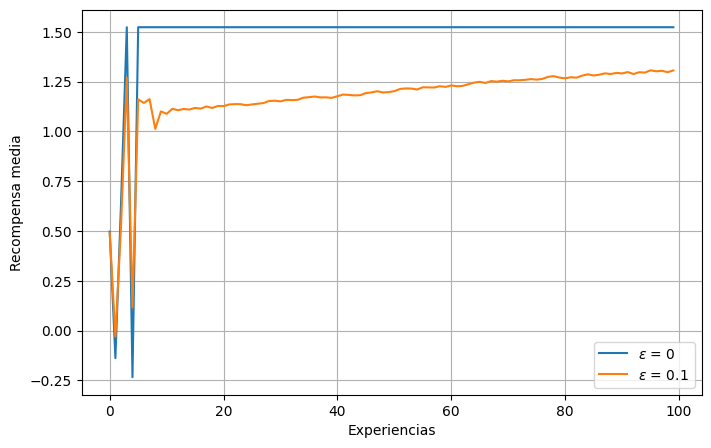

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for i, e in enumerate(epsilons):
    plt.plot(recompensas_medias[i], label=f'$\epsilon$ = {e}')
plt.legend()
plt.grid(True)
plt.xlabel('Experiencias')
plt.ylabel('Recompensa media')
plt.show()